In [ ]:
!pip install tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.metrics import Recall, Precision

from sklearn.metrics import confusion_matrix


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
X_file = "/content/gdrive/My Drive/OAS12_X"
with open(X_file, 'rb') as file_X:
  X = np.fromfile(file_X)

X = X.reshape(2281, 256, 572, 1)   

In [7]:
y_file = "/content/gdrive/My Drive/OAS12_y"
with open(y_file, 'rb') as file_y:
  y = np.fromfile(file_y)

y_df = pd.DataFrame(y)
y_df[0] = y_df[0].apply(lambda x : 0 if x == 0 else 1)
y = np.array(y_df)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
def plot_cf_matrix(cf_matrix, model_name):
    '''plt the confusion matrix of a model'''
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    
    labels = np.asarray(labels).reshape(2,2)
    
    plt.title(model_name)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    
    return None

In [11]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['recall'])
    ax[1].plot(history.history['val_recall'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

# DIY CNN

In [12]:
def diy_cnn(X):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), strides=(3, 3),
                  activation='sigmoid', padding ='same',
                  input_shape=X.shape[1:]))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
  model.add(Conv2D(16, (3, 3), activation='sigmoid', strides=(3, 3), padding ='same'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
  model.add(Conv2D(8, kernel_size=(3,3), activation='sigmoid', strides = (3,3), padding ='same'))
  model.add(MaxPooling2D(pool_size=(1, 1), padding='valid'))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', 'Recall', 'Precision'])
  
  return model

In [42]:
model_diy_cnn = diy_cnn(X)
model_diy_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 86, 191, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 95, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 32, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 16, 16)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 6, 8)           1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 6, 8)         

In [43]:
es = EarlyStopping(monitor='loss',
                   min_delta=0,
                   patience=8,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

history_diy_cnn = model_diy_cnn.fit(X_train, y_train,
                          epochs = 100,
                          batch_size = 32,
                          validation_split=0.2,
                          callbacks = [es])

Epoch 1/100
43/43 [==============================] - 3s 45ms/step - loss: 0.6959 - accuracy: 0.5212 - recall: 0.2857 - precision: 0.4416 - val_loss: 0.6895 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 1s 23ms/step - loss: 0.6867 - accuracy: 0.5548 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6853 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
43/43 [==============================] - 1s 23ms/step - loss: 0.6851 - accuracy: 0.5548 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6854 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
43/43 [==============================] - 1s 24ms/step - loss: 0.6824 - accuracy: 0.5497 - recall: 0.1330 - precision: 0.4793 - val_loss: 0.6920 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
43/43 [==============================] - 1s 

In [44]:
model_diy_cnn.evaluate(X_test, y_test)

18/18 [==============================] - 0s 18ms/step - loss: 0.3837 - accuracy: 0.8494 - recall: 0.8125 - precision: 0.8263


[0.3836798667907715, 0.8493870496749878, 0.8125, 0.8262711763381958]

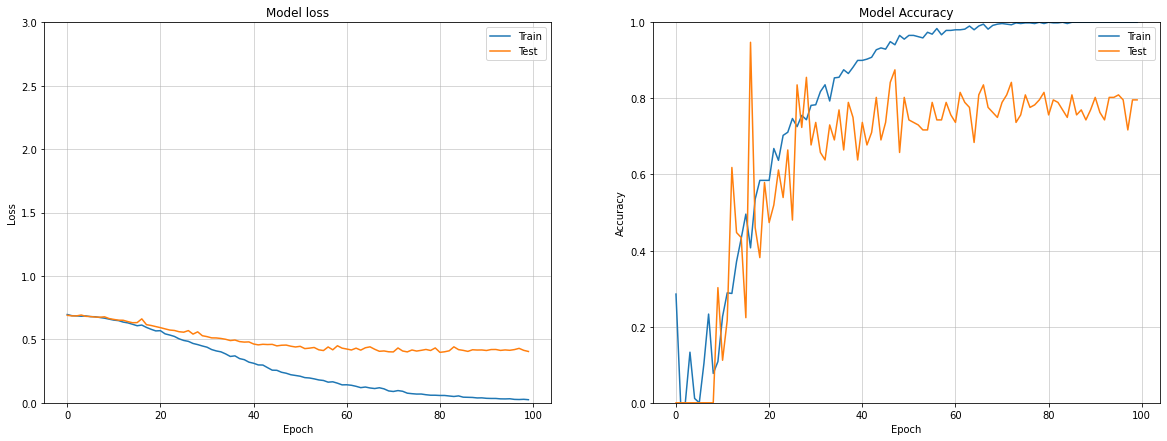

In [45]:
plot_loss_accuracy(history_diy_cnn)

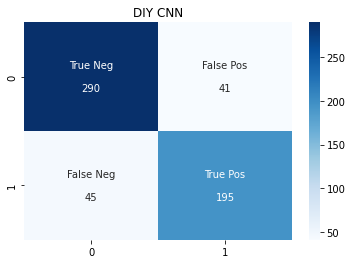

In [46]:
y_pred_diy_cnn = np.round(model_diy_cnn.predict(X_test), 0)

conf_matrix_diy_cnn = confusion_matrix(y_true=y_test, y_pred=y_pred_diy_cnn)

plot_cf_matrix(conf_matrix_diy_cnn, 'DIY CNN')

# DIY CNN fine-tuned

In [13]:
model_diy_cnn_fine = diy_cnn(X)
model_diy_cnn_fine.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 86, 191, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 43, 95, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 16, 16)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 6, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 6, 8)          0

In [14]:
es = EarlyStopping(monitor='loss',
                   min_delta=0,
                   patience=8,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

history_diy_cnn_fine = model_diy_cnn_fine.fit(X_train, y_train,
                          epochs = 40,
                          batch_size = 32,
                          validation_split=0.2,
                          callbacks = [es])

Epoch 1/40
43/43 [==============================] - 12s 45ms/step - loss: 0.7160 - accuracy: 0.5278 - recall: 0.2268 - precision: 0.4335 - val_loss: 0.6834 - val_accuracy: 0.5702 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/40
43/43 [==============================] - 1s 23ms/step - loss: 0.6866 - accuracy: 0.5585 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6924 - val_accuracy: 0.5556 - val_recall: 0.1224 - val_precision: 0.4390
Epoch 3/40
43/43 [==============================] - 1s 23ms/step - loss: 0.6905 - accuracy: 0.5526 - recall: 0.0546 - precision: 0.4459 - val_loss: 0.6917 - val_accuracy: 0.5731 - val_recall: 0.0136 - val_precision: 0.6667
Epoch 4/40
43/43 [==============================] - 1s 31ms/step - loss: 0.6872 - accuracy: 0.5592 - recall: 0.0248 - precision: 0.5172 - val_loss: 0.6824 - val_accuracy: 0.5702 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/40
43/43 [==============================] - 1s 30ms/step - loss: 0.6863 - a

In [17]:
model_diy_cnn_fine.evaluate(X_test, y_test)

18/18 [==============================] - 0s 18ms/step - loss: 0.5730 - accuracy: 0.7075 - recall: 0.4760 - precision: 0.7677


[0.5729883313179016,
 0.707530677318573,
 0.47600001096725464,
 0.7677419185638428]

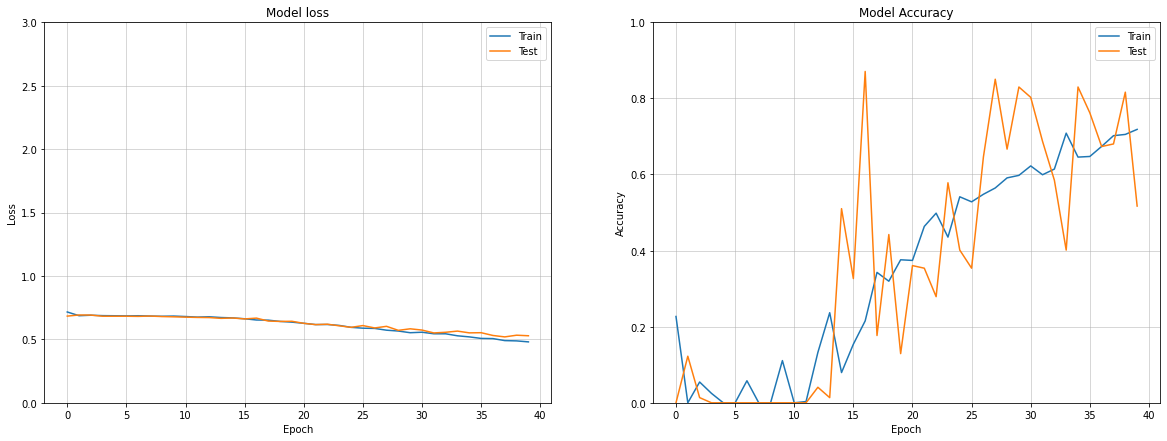

In [15]:
plot_loss_accuracy(history_diy_cnn_fine)

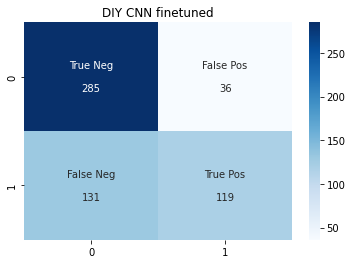

In [16]:
y_pred_diy_cnn_fine = np.round(model_diy_cnn_fine.predict(X_test), 0)

conf_matrix_diy_cnn_fine = confusion_matrix(y_true=y_test, y_pred=y_pred_diy_cnn_fine)

plot_cf_matrix(conf_matrix_diy_cnn_fine, 'DIY CNN finetuned')

# ResNet50

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
def create_resnet50(X):
  base_model = ResNet50(
      include_top=False, weights=None,
      input_shape=X.shape[1:], pooling=None, classes=1)
  model = Sequential(base_model)
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', 'Recall', 'Precision'])
  return model

In [14]:
model_resnet50 = create_resnet50(X)
model_resnet50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 18, 2048)       23581440  
                                                                 
 flatten (Flatten)           (None, 294912)            0         
                                                                 
 dense (Dense)               (None, 1)                 294913    
                                                                 
Total params: 23,876,353
Trainable params: 23,823,233
Non-trainable params: 53,120
_________________________________________________________________


In [15]:
es = EarlyStopping(monitor='loss',
                   min_delta=0,
                   patience=8,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

history_resnet50 = model_resnet50.fit(X_train, y_train,
                          epochs = 100,
                          batch_size = 32,
                          validation_split=0.2,
                          callbacks = [es])

Epoch 1/100
43/43 [==============================] - 65s 1s/step - loss: 11.5523 - accuracy: 0.5336 - recall: 0.4631 - precision: 0.4755 - val_loss: 2253.7671 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 38s 877ms/step - loss: 4.0661 - accuracy: 0.5709 - recall: 0.5205 - precision: 0.5180 - val_loss: 1361344.1250 - val_accuracy: 0.5439 - val_recall: 0.0132 - val_precision: 0.2500
Epoch 3/100
43/43 [==============================] - 38s 887ms/step - loss: 3.9397 - accuracy: 0.5256 - recall: 0.4828 - precision: 0.4682 - val_loss: 29467.0605 - val_accuracy: 0.5673 - val_recall: 0.1316 - val_precision: 0.5556
Epoch 4/100
43/43 [==============================] - 38s 895ms/step - loss: 2.5994 - accuracy: 0.5863 - recall: 0.5205 - precision: 0.5364 - val_loss: 1.4494 - val_accuracy: 0.6316 - val_recall: 0.7368 - val_precision: 0.5657
Epoch 5/100
43/43 [==============================] - 39s 897ms/step - loss: 2

In [16]:
model_resnet50.evaluate(X_test, y_test)

18/18 [==============================] - 6s 322ms/step - loss: 0.2614 - accuracy: 0.9475 - recall: 0.9417 - precision: 0.9339


[0.2613682448863983, 0.9474605917930603, 0.9416666626930237, 0.93388432264328]

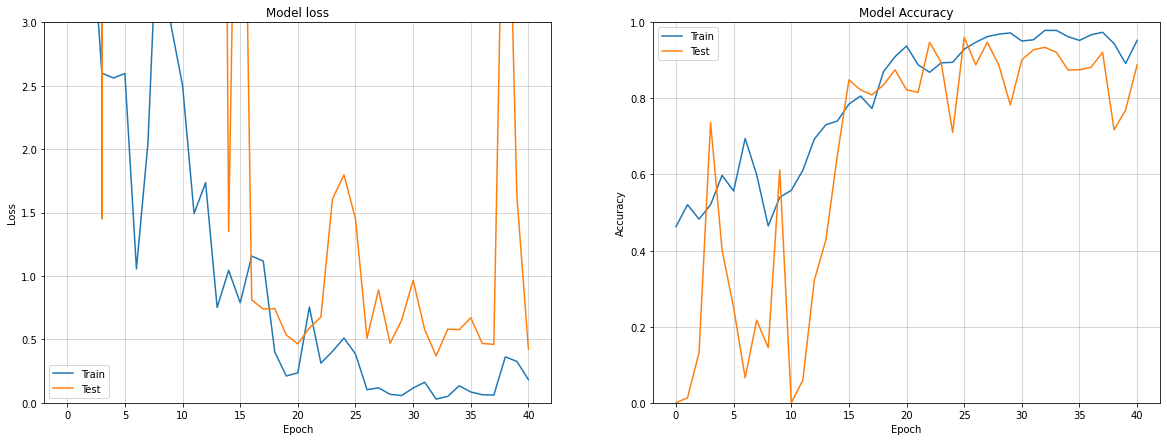

In [17]:
plot_loss_accuracy(history_resnet50)

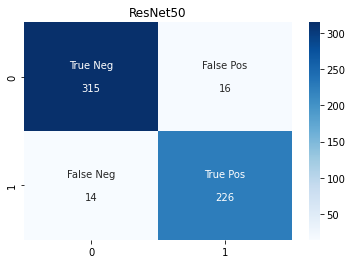

In [39]:
y_pred_resnet50 = np.round(model_resnet50.predict(X_test), 0)

conf_matrix_resnet50 = confusion_matrix(y_true=y_test, y_pred=y_pred_resnet50)

plot_cf_matrix(conf_matrix_resnet50, 'ResNet50')

# ResNet50V2

In [30]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [33]:
def create_resnet50v2(X):
  base_model = ResNet50V2(
      include_top=False, weights=None,
      input_shape=X.shape[1:], pooling=None, classes=1, classifier_activation='sigmoid')
  model = Sequential(base_model)
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', 'Recall', 'Precision'])
  return model

In [34]:
model_resnet50v2 = create_resnet50v2(X)
model_resnet50v2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 18, 2048)       23558528  
                                                                 
 flatten_3 (Flatten)         (None, 294912)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 294913    
                                                                 
Total params: 23,853,441
Trainable params: 23,808,001
Non-trainable params: 45,440
_________________________________________________________________


In [35]:
es = EarlyStopping(monitor='loss',
                   min_delta=0,
                   patience=8,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

history_resnet50v2 = model_resnet50v2.fit(X_train, y_train,
                          epochs = 100,
                          batch_size = 32,
                          validation_split=0.2,
                          callbacks = [es])

Epoch 1/100
43/43 [==============================] - 48s 891ms/step - loss: 5.0936 - accuracy: 0.5197 - recall: 0.4811 - precision: 0.4621 - val_loss: 132352.8438 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 33s 767ms/step - loss: 2.2910 - accuracy: 0.5504 - recall: 0.4368 - precision: 0.4944 - val_loss: 5476.2563 - val_accuracy: 0.5468 - val_recall: 0.0263 - val_precision: 0.3636
Epoch 3/100
43/43 [==============================] - 33s 773ms/step - loss: 1.5085 - accuracy: 0.5965 - recall: 0.4532 - precision: 0.5576 - val_loss: 131.5947 - val_accuracy: 0.5322 - val_recall: 0.5000 - val_precision: 0.4750
Epoch 4/100
43/43 [==============================] - 33s 775ms/step - loss: 1.5421 - accuracy: 0.6272 - recall: 0.5337 - precision: 0.5898 - val_loss: 299.7877 - val_accuracy: 0.5292 - val_recall: 0.0526 - val_precision: 0.3200
Epoch 5/100
43/43 [==============================] - 34s 781ms/step - loss: 

In [36]:
model_resnet50v2.evaluate(X_test, y_test)

18/18 [==============================] - 5s 291ms/step - loss: 0.5996 - accuracy: 0.9527 - recall: 0.9125 - precision: 0.9733


[0.5996165871620178,
 0.9527145624160767,
 0.9125000238418579,
 0.9733333587646484]

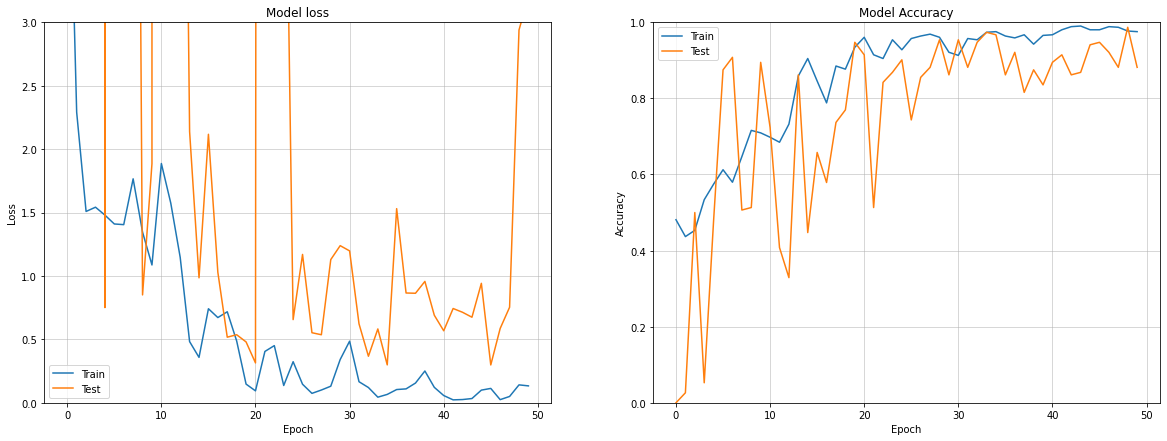

In [37]:
plot_loss_accuracy(history_resnet50v2)

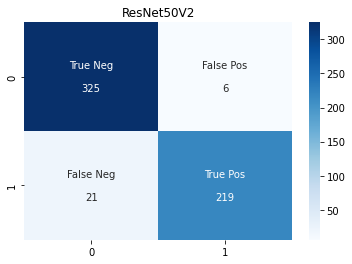

In [40]:
y_pred_resnet50v2 = np.round(model_resnet50v2.predict(X_test), 0)

conf_matrix_resnet50v2 = confusion_matrix(y_true=y_test, y_pred=y_pred_resnet50v2)

plot_cf_matrix(conf_matrix_resnet50v2, 'ResNet50V2')

# VGG16

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16

In [19]:
def create_vgg16(X):
  base_model = VGG16(include_top=False, 
                     weights=None,
                     input_shape=X.shape[1:], 
                     pooling=None, 
                     classes=1,
                     classifier_activation='sigmoid')
  model = Sequential(base_model)
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', 'Recall', 'Precision'])
  
  return model

In [20]:
vgg16_model = create_vgg16(X)

In [21]:
es = EarlyStopping(monitor='loss',
                   min_delta=0,
                   patience=8,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

history_vgg16 = vgg16_model.fit(X_train, y_train,
                          epochs = 100,
                          batch_size = 32,
                          validation_split=0.2,
                          callbacks = [es])

Epoch 1/100
43/43 [==============================] - 88s 2s/step - loss: 288.8008 - accuracy: 0.5314 - recall: 0.2578 - precision: 0.4538 - val_loss: 0.6870 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 57s 1s/step - loss: 0.7187 - accuracy: 0.5563 - recall: 0.0279 - precision: 0.5312 - val_loss: 0.6877 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
43/43 [==============================] - 57s 1s/step - loss: 0.6886 - accuracy: 0.5548 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6879 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
43/43 [==============================] - 58s 1s/step - loss: 0.6874 - accuracy: 0.5548 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6870 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
43/43 [==============================] - 58s 1

In [22]:
vgg16_model.evaluate(X_test, y_test)

18/18 [==============================] - 11s 642ms/step - loss: 0.6812 - accuracy: 0.5797 - recall: 0.0000e+00 - precision: 0.0000e+00


[0.6811746954917908, 0.5796847343444824, 0.0, 0.0]

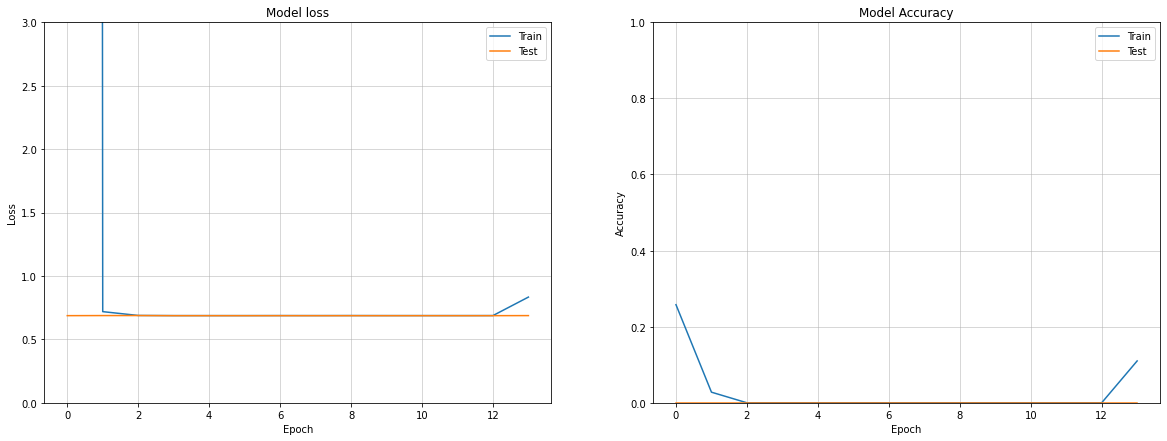

In [23]:
plot_loss_accuracy(history_vgg16)

# VGG19

In [24]:
from tensorflow.keras.applications.vgg19 import VGG19

In [25]:
def create_vgg19(X):
  base_model = VGG19(include_top=False, 
                     weights=None,
                     input_shape=X.shape[1:], 
                     pooling=None, 
                     classes=1,
                     classifier_activation='sigmoid')
  model = Sequential(base_model)
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', 'Recall', 'Precision'])
  
  return model

In [26]:
vgg19_model = create_vgg19(X)

In [27]:
es = EarlyStopping(monitor='loss',
                   min_delta=0,
                   patience=8,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

history_vgg19 = vgg19_model.fit(X_train, y_train,
                          epochs = 100,
                          batch_size = 32,
                          validation_split=0.2,
                          callbacks = [es])

Epoch 1/100
43/43 [==============================] - 67s 2s/step - loss: 191.1219 - accuracy: 0.5307 - recall: 0.2463 - precision: 0.4505 - val_loss: 0.6870 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 66s 2s/step - loss: 0.6960 - accuracy: 0.5526 - recall: 0.0493 - precision: 0.4762 - val_loss: 0.6885 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
43/43 [==============================] - 66s 2s/step - loss: 0.6892 - accuracy: 0.5548 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6873 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
43/43 [==============================] - 67s 2s/step - loss: 0.6895 - accuracy: 0.5548 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6869 - val_accuracy: 0.5556 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
43/43 [==============================] - 67s 2

In [28]:
vgg19_model.evaluate(X_test, y_test)

18/18 [==============================] - 9s 481ms/step - loss: 0.6819 - accuracy: 0.5797 - recall: 0.0000e+00 - precision: 0.0000e+00


[0.6818674802780151, 0.5796847343444824, 0.0, 0.0]

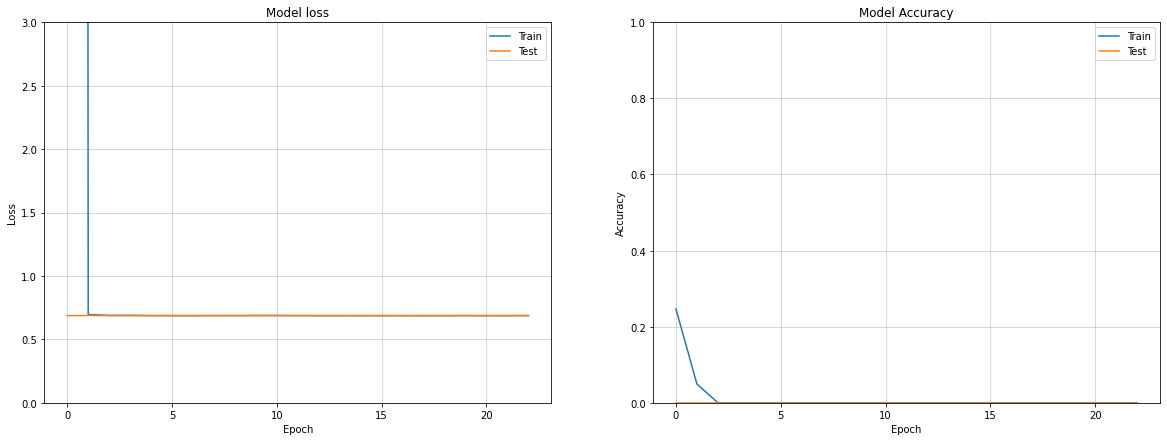

In [29]:
plot_loss_accuracy(history_vgg19)